In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'NoiseDS_07A20Hz_17A42Hz'

# extra step to make a new file with the same name only with 'SimParams.mat' added
simparameter=list(namenoise)
simparameter.append('_SimParams.mat')
simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [amplitude sine1 (nA), frequency sine1(Hz), amplitude sine2, frequency sine2],
#  duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[0.7,20,1.7,42],1000,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')



Noise input is of type double sine
Data is saved


In [3]:
SimParams = Struct()
######################## Save
SimParams.saving = 'yes' #'yes','no'
######################## plot
SimParams.plotting = 'yes' #'yes','no'
######################## Experiment length
SimParams.dt = 0.025*ms
SimParams.exp_runtime = (size(Noise_t))*SimParams.dt #/0.025 if noise dt=t_monitor
######################## Neuronal responses to run. 
SimParams.IO_response='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams.N_Cells_PC = 10
SimParams.N_Cells_DCN = 20
SimParams.N_Cells_IO = 20
######################## Saving SimParams

sio.savemat(simparameter, mdict={'SimParams': SimParams})

WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.8, 0.9, 1. , 0.9, 0.8, 0.7,
       0.6, 0.5, 0.4, 0.3, 0.7, 0.8, 0.9, 1. , 0.9, 0.8, 0.7, 0.6, 0.5,
       0.4, 0.6, 0.7, 0.8, 0.9, 1. , 0.9, 0.8, 0.7, 0.6, 0.5])>


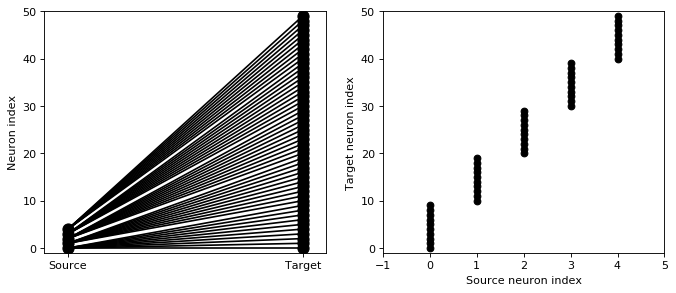

In [4]:
from E_Synapses_Plasticity import *

In [5]:
run(exp_runtime*2,report='text')

WARNING    The expression "N_Cells_DCN / 2" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


Starting simulation at t=0. s for a duration of 2. s
0.13415000000000002 (6%) simulated in 10s, estimated 2m 19s remaining.
0.265225 (13%) simulated in 20s, estimated 2m 11s remaining.
0.4036 (20%) simulated in 30s, estimated 1m 59s remaining.
0.541825 (27%) simulated in 40s, estimated 1m 48s remaining.
0.6757500000000001 (33%) simulated in 50s, estimated 1m 38s remaining.
0.8192250000000001 (40%) simulated in 1m 0s, estimated 1m 27s remaining.
0.9636750000000001 (48%) simulated in 1m 10s, estimated 1m 15s remaining.
1.09135 (54%) simulated in 1m 20s, estimated 1m 7s remaining.
1.23875 (61%) simulated in 1m 30s, estimated 55s remaining.
1.3817000000000002 (69%) simulated in 1m 40s, estimated 45s remaining.
1.5255750000000001 (76%) simulated in 1m 50s, estimated 34s remaining.
1.657775 (82%) simulated in 2m 0s, estimated 25s remaining.
1.8027250000000001 (90%) simulated in 2m 10s, estimated 14s remaining.
1.941275 (97%) simulated in 2m 20s, estimated 4s remaining.
2.0 (100%) simulated i

In [6]:
from F_save_data_Plasticity import *

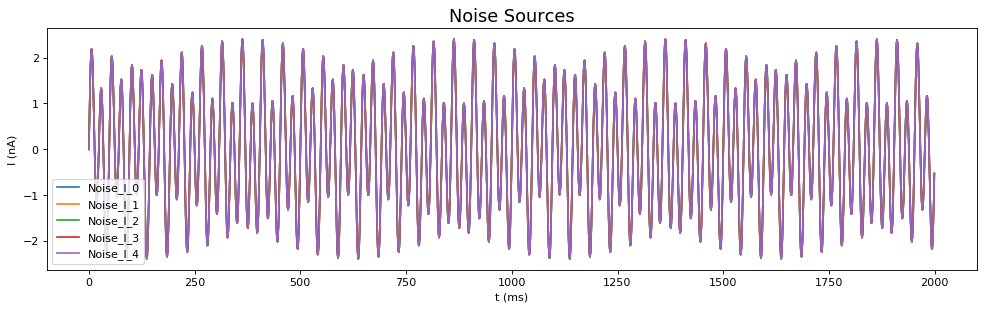

Plasticity


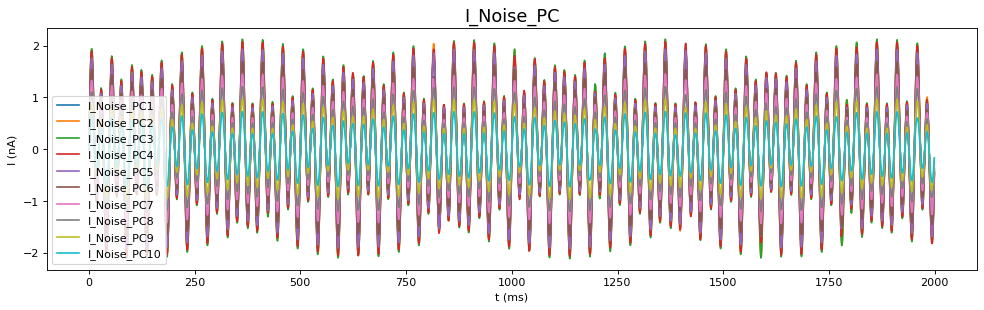

Plasticity Coupled Scenario


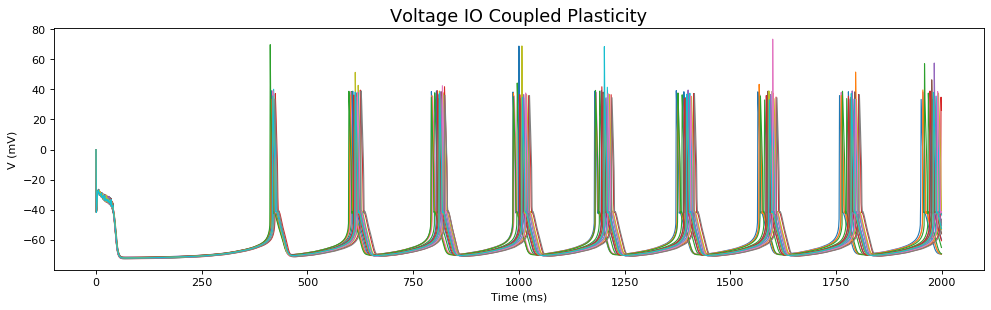

Number of spikes DCN: 128
Number of spikes DCN: 124
Number of spikes DCN: 127
Number of spikes DCN: 123
Number of spikes DCN: 117
Number of spikes DCN: 124
Number of spikes DCN: 111
Number of spikes DCN: 121
Number of spikes DCN: 122
Number of spikes DCN: 126


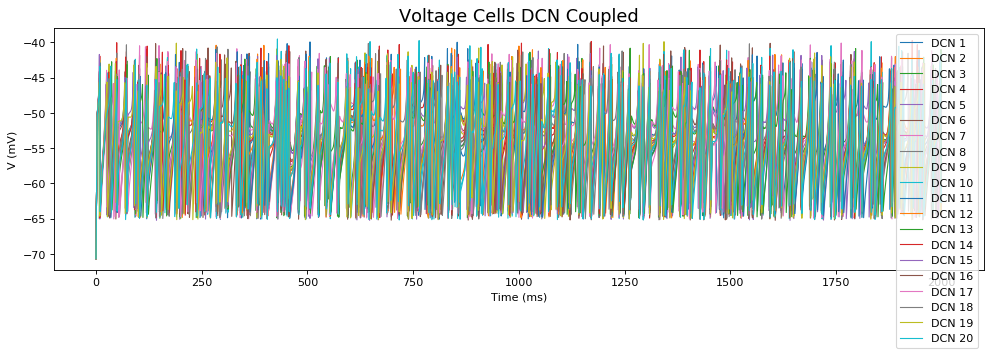

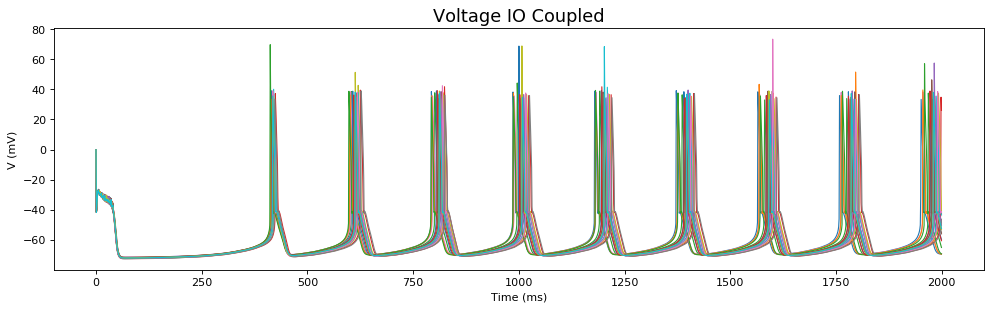

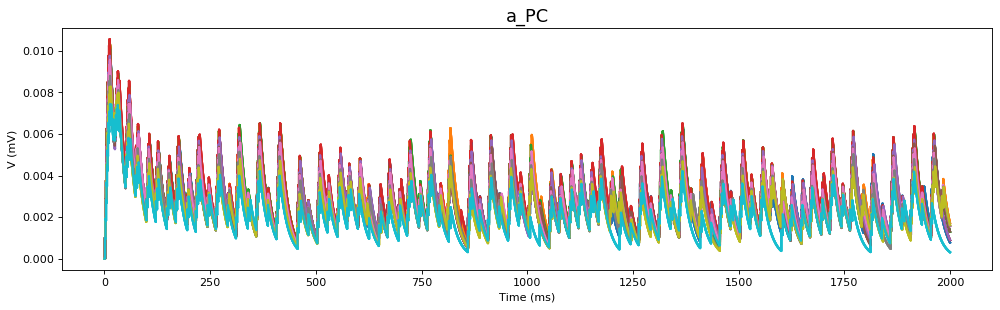

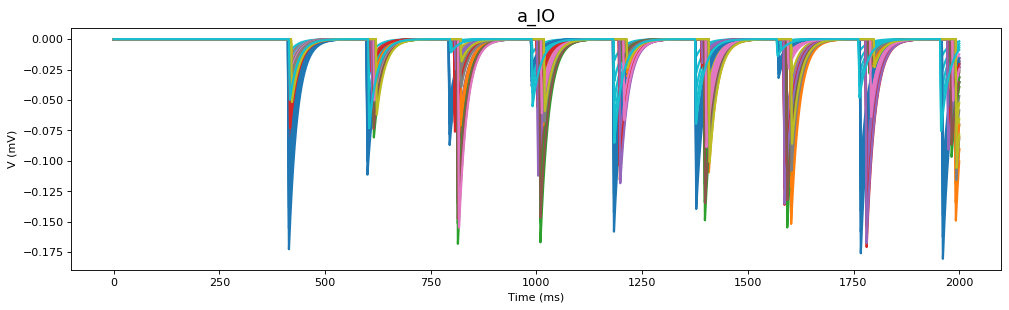

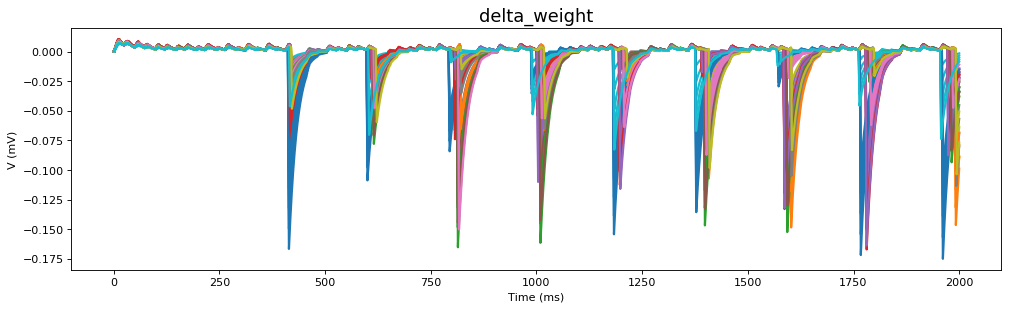

Plasticity Uncoupled Scenario


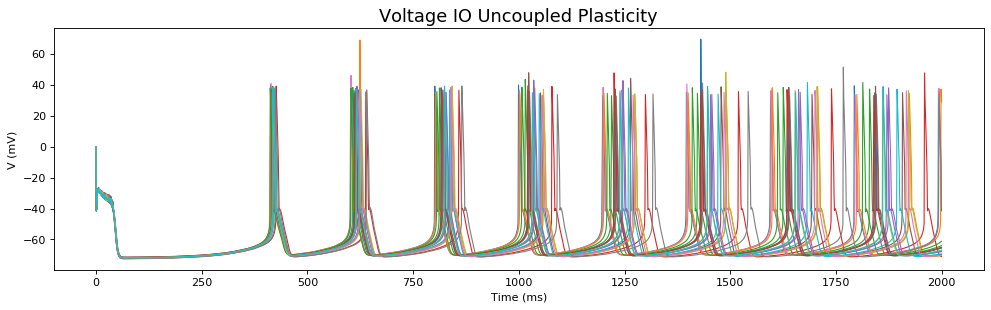

Number of spikes DCN: 125
Number of spikes DCN: 118
Number of spikes DCN: 128
Number of spikes DCN: 120
Number of spikes DCN: 118
Number of spikes DCN: 122
Number of spikes DCN: 109
Number of spikes DCN: 121
Number of spikes DCN: 121
Number of spikes DCN: 125


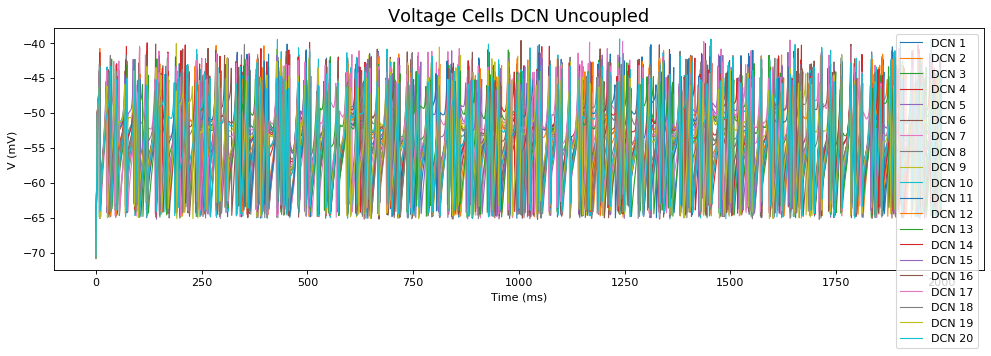

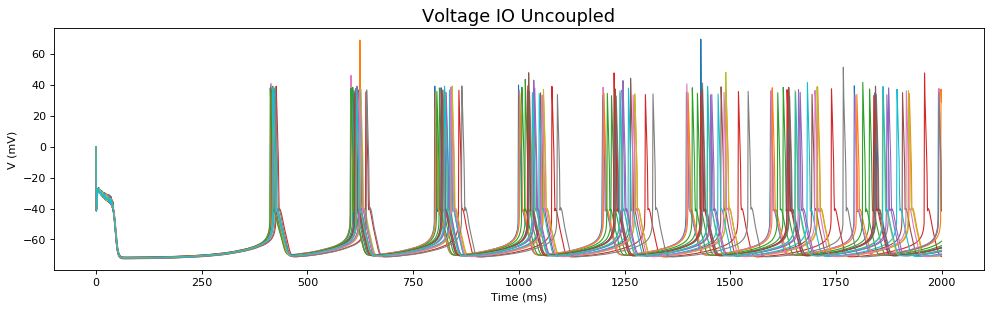

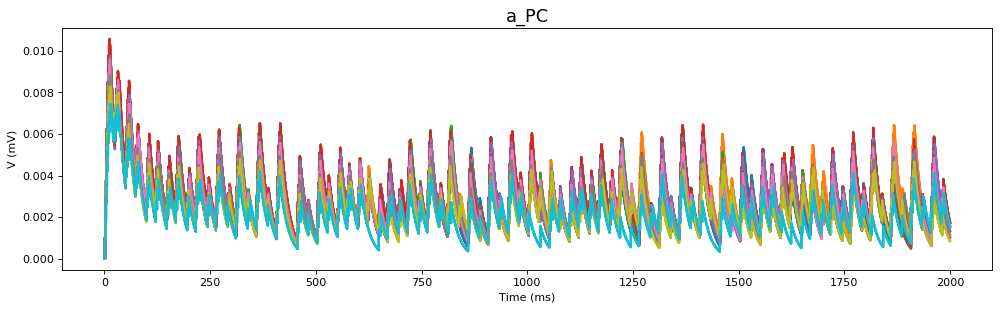

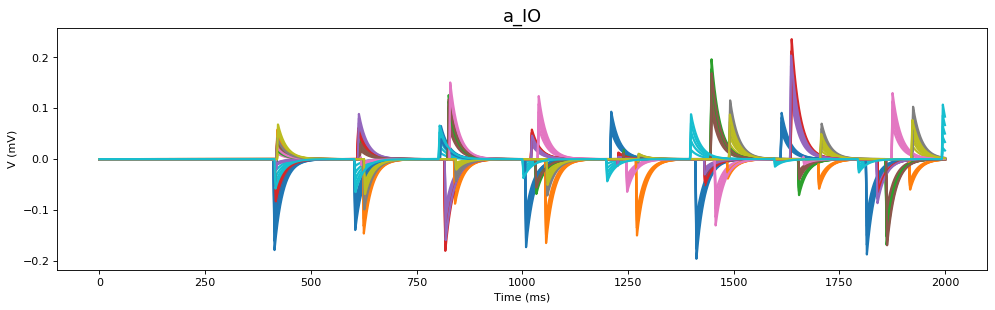

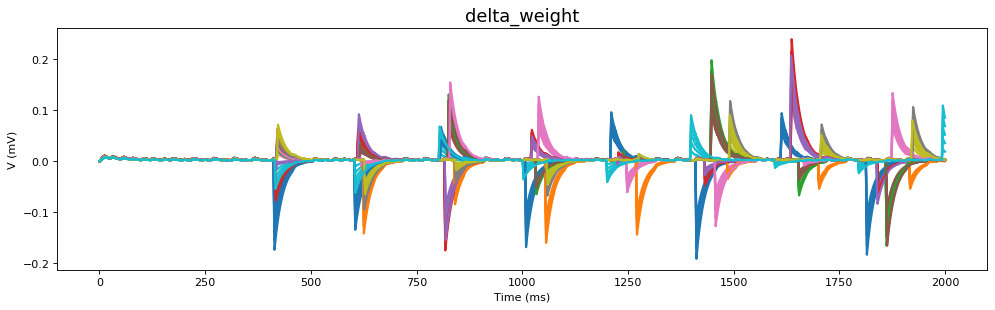

In [7]:
from G_Plot_Plasticity import *

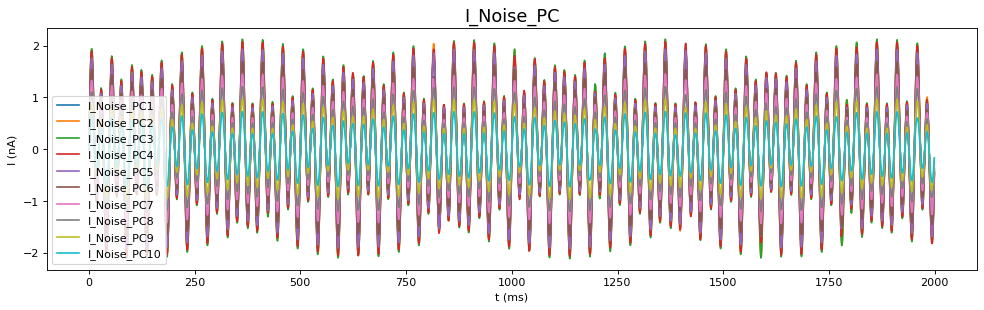

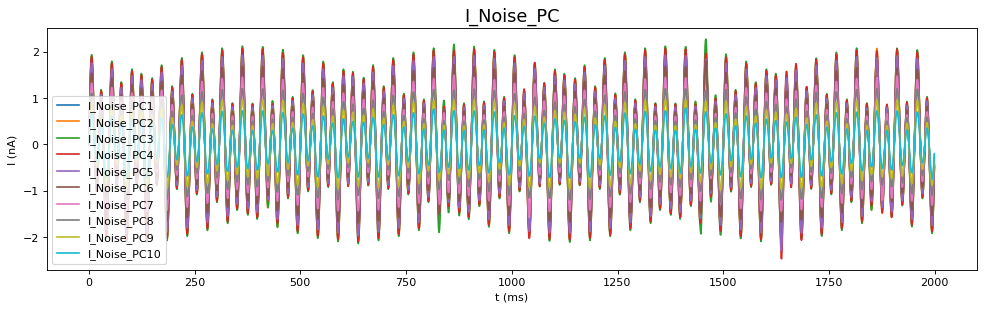

In [8]:
figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('I_Noise_PC', fontsize=16)
for pp in range(0,N_Cells_PC):
    plot(PC_Statemon_Coupled_STDP.t/ms,PC_Statemon_Coupled_STDP.I_Noise[pp]/nA, ('C'+str(pp)), label=('I_Noise_PC'+str(1+pp)))
legend(loc='best')
xlabel('t (ms)')
ylabel('I (nA)')
legend();
show() 

figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('I_Noise_PC', fontsize=16)
for pp in range(0,N_Cells_PC):
    plot(PC_Statemon_Uncoupled_STDP.t/ms,PC_Statemon_Uncoupled_STDP.I_Noise[pp]/nA, ('C'+str(pp)), label=('I_Noise_PC'+str(1+pp)))
legend(loc='best')
xlabel('t (ms)')
ylabel('I (nA)')
legend();
show() 

In [9]:
    for pp in range(0,N_Cells_PC,1):    
        DCN_spikes_Uncoupled_STDP = DCN_Statemon_Uncoupled_STDP.v[:]
        Times_DCN_Uncoupled_STDP = DCN_Spikemon_Uncoupled_STDP.values('t')[pp]/(dt)
        print("Number of spikes DCN: %s"% np.size(Times_DCN_Uncoupled_STDP))
        for t in range(0,np.size(Times_DCN_Uncoupled_STDP),1):
            i = int(Times_DCN_Uncoupled_STDP[t])
            DCN_spikes_Uncoupled_STDP[pp][i] = 60*mV
        PC_spikes_Uncoupled_STDP = PC_Statemon_Uncoupled_STDP.v[:]
        Times_PC_Uncoupled_STDP = PC_Spikemon_Uncoupled_STDP.values('t')[pp]/(dt)
        print("Number of spikes PC: %s"% np.size(Times_PC_Uncoupled_STDP))
        for t in range(0,np.size(Times_PC_Uncoupled_STDP),1):
            i = int(Times_PC_Uncoupled_STDP[t])
            PC_spikes_Uncoupled_STDP[pp][i] = 50*mV
        figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
        title('Voltage Cells '+str(pp+1) + ' Uncoupled', fontsize=16)
        plot(PC_Statemon_Uncoupled_STDP.t/ms, PC_spikes_Uncoupled_STDP[pp]/mV, ('C'+str(2)), label=('PC'+' '+str(pp+1)))
        plot(IO_Statemon_Uncoupled_STDP.t/msecond, IO_Statemon_Uncoupled_STDP.Vs[pp]/mvolt, ('C'+str(3)), lw='4', label=('Vs'+' '+str(pp+1)))
        plot(DCN_Statemon_Uncoupled_STDP.t/ms, DCN_spikes_Uncoupled_STDP[pp]/mV, ('C'+str(4)), lw='1',label=('DCN'+' '+str(pp+1)))
        legend(loc='best')
        xlabel('Time (ms)')
        ylabel('V (mV)')
        legend();
        show()

Number of spikes DCN: 125


IndexError: index 2791 is out of bounds for axis 0 with size 2000

In [ ]:
figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
title('a_IO', fontsize=16)
for pp in range(0,n_Noise*n_PC,1):
    plot(mon_N_PC_Coupled.t/msecond, mon_N_PC_Coupled.a_IO[pp], ('C'+str(pp)), lw='2')
xlabel('Time (ms)')
ylabel('V (mV)')
show()